In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

%matplotlib inline 
#wyswietlanie wykresow. 

In [2]:
X_train = pd.read_csv("../Cancer/output/X_train.csv", index_col = "index")
y_train = pd.read_csv("../Cancer/output/y_train.csv", names = ["index", "klasa"], index_col = "index")

X_test = pd.read_csv("../Cancer/output/X_test.csv", index_col = "index")
y_test = pd.read_csv("../Cancer/output/y_test.csv", names = ["index", "klasa"], index_col = "index")

In [3]:
#dokladamy asercje, czyli zwraca błąd jeżeli w tym miejscu jest wartość false. TAki "hamulec bezpieczeństwa"
assert (X_train.index == y_train.index).all() == True
assert (X_test.index == y_test.index).all() == True

In [4]:
#Uruchomienie prostego lasu losowego
#funkcja budująca las losowy

In [5]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\06\Anaconda3\envs\srodowisko\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
las=RandomForestClassifier(criterion="entropy", random_state=42, bootstrap=False, max_features=None)  
#bootstrap=False - bazujemy na pełnym zbiorze

In [7]:
las.fit(X=X_train, y = y_train.values.ravel())  #ravel - odwrócenie z kolumny na wiersz. Wykonujemy trening

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [8]:
las.score(X=X_test, y=y_test)

0.868421052631579

In [9]:
las.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min

In [10]:
#LAS NA BAZIE POPRZEDNIO WYLICZONYCH HIPERPARAMETRÓW

In [11]:
hiperparametry = {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [12]:
las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = False, max_features = None, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"])

In [13]:
las.fit(X = X_train, y = y_train.values.ravel())

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=4, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [14]:
las.score(X = X_test, y = y_test)

0.9298245614035088

In [15]:
las.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=5, min_samples_split=10,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=5, min_samples_split=10,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=5, min_samples_split=10,
             min_weigh

In [16]:
#lasy utworzone do tej pory nie były za bardzo losowe , bo bazowały na tych samych danych i parametrach
#teraz użyjemy parametru bootstrap=true, aby wykorzystać losowanie ze zwracaniem

In [17]:
las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = True, max_features = None, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"])

In [18]:
las.fit(X = X_train, y = y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
las.score(X=X_test, y=y_test)

0.9473684210526315

In [20]:
#selekcja cech - użyjemy sugerowanej metody - pierwiastek ze wszystkich cech
#max_features=sqrt(n_features)

In [21]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [22]:
max_features = int(np.sqrt(len(X_train.columns))) #pierwiastek z 30 int zamienia liczbę zmiennoprzecinkową na całkowitą

In [23]:
max_features

5

In [24]:
#teraz będzie brane pod uwagę 5 losowych cech
las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = True, max_features = max_features, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"])

In [25]:
las.fit(X = X_train, y = y_train.values.ravel())
las.score(X = X_test, y = y_test)

0.9649122807017544

In [26]:
#TEST STABILNOŚCI

In [27]:
nazwy_kolumn = ["klasa", "mean radius", "mean texture", "mean perimeter", "mean area","mean smoothness", 
                "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension", 
                "radius error", "texture error", "perimeter error", "area error", "smoothness error", 
                "compactness error", "concavity error", "concave points error", "symmetry error", 
                "fractal dimension error", "worst radius", "worst texture", "worst perimeter", "worst area", 
                "worst smoothness", "worst compactness", "worst concavity", "worst concave points", "worst symmetry", 
                "worst fractal dimension"]

nowotwor = pd.read_csv("../Cancer/input/wdbc.data", names = nazwy_kolumn)

nowotwor["klasa"] = nowotwor["klasa"].str.replace("B", "Ł")
nowotwor["klasa"] = nowotwor["klasa"].str.replace("M", "Z")

X = nowotwor.drop(["klasa"], axis = 1)
y = nowotwor["klasa"]

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [28]:
%%time
rezultaty = pd.DataFrame()
for ziarno_losowośći in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=ziarno_losowośći, stratify = y)
    las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = True, max_features = max_features, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"])
    las.fit(X = X_train, y = y_train)
    głupi = DummyClassifier(strategy="stratified", random_state=42)
    głupi.fit(X = X_train, y = y_train)
    rezultaty = rezultaty.append({"dokładność_las": las.score(X = X_test, y = y_test), 
                                  "dokładność_głupi": głupi.score(X = X_test, y = y_test)}, ignore_index = True)

Wall time: 4.89 s


In [29]:
rezultaty

,dokładność_głupi,dokładność_las
0,0.508772,0.929825
1,0.596491,0.929825
2,0.578947,0.973684
3,0.543860,0.964912
4,0.596491,0.964912
5,0.543860,0.964912
6,0.508772,0.964912
7,0.526316,0.938596
8,0.526316,0.982456
9,0.543860,0.956140


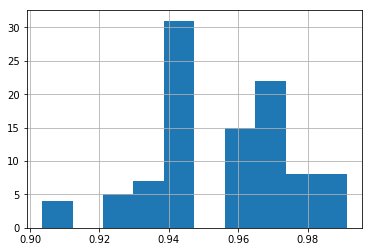

In [30]:
rezultaty["dokładność_las"].hist()

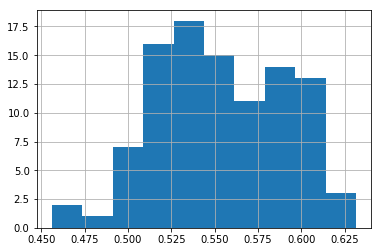

In [31]:
rezultaty["dokładność_głupi"].hist()

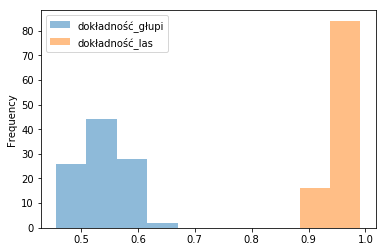

In [32]:
rezultaty.plot.hist(alpha=0.5)

In [33]:
pandas_profiling.ProfileReport(rezultaty)

Number of variables,2
Number of observations,100
Total Missing (%),0.0%
Total size in memory,1.6 KiB
Average record size in memory,16.8 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [34]:
#Las - czy większy znaczy lepszy?

In [35]:
#zwiekszamy liczbę drzew do 100

In [36]:
%%time
rezultaty = pd.DataFrame()
for ziarno_losowośći in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=ziarno_losowośći, stratify = y)
    las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = True, max_features = max_features, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"], n_estimators = 100)
    las.fit(X = X_train, y = y_train)
    głupi = DummyClassifier(strategy="stratified", random_state=42)
    głupi.fit(X = X_train, y = y_train)
    rezultaty = rezultaty.append({"dokładność_las": las.score(X = X_test, y = y_test), 
                                  "dokładność_głupi": głupi.score(X = X_test, y = y_test)}, ignore_index = True)

Wall time: 35 s


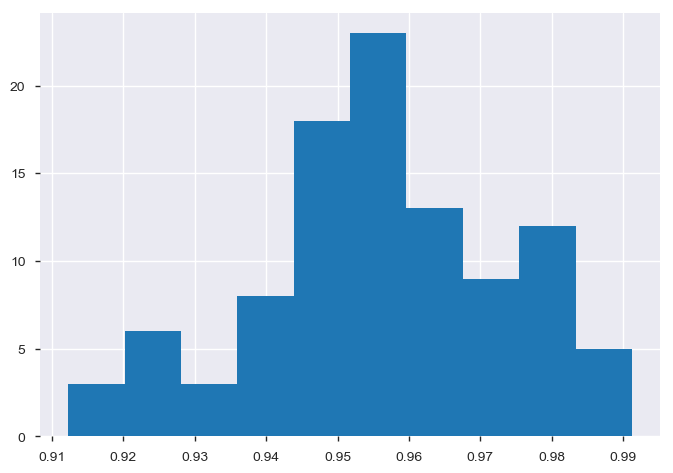

In [37]:
rezultaty["dokładność_las"].hist()

In [39]:
pandas_profiling.ProfileReport(rezultaty)

Number of variables,2
Number of observations,100
Total Missing (%),0.0%
Total size in memory,1.6 KiB
Average record size in memory,16.8 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [40]:
#Feature importances

In [41]:
las.feature_importances_ # informacja o tym, jak dana cecha przyczyniła się do dokonania predykcji

array([0.05901004, 0.01112241, 0.06789402, 0.04190245, 0.00303736,
       0.00846361, 0.05970381, 0.08995212, 0.0029306 , 0.00281579,
       0.01156891, 0.0017086 , 0.01126133, 0.03777493, 0.00173118,
       0.00465333, 0.00598432, 0.00165682, 0.003117  , 0.0019966 ,
       0.0621793 , 0.0174366 , 0.09326033, 0.19684338, 0.01349375,
       0.01118907, 0.0361077 , 0.12798112, 0.00717237, 0.00605114])

In [42]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [43]:
las.feature_importances_.sum()

0.9999999999999998

In [47]:
a=zip(X_train.columns,las.feature_importances_)

In [48]:
set(a)

{('area error', 0.03777493390813565),
 ('compactness error', 0.004653328720315431),
 ('concave points error', 0.001656822539550704),
 ('concavity error', 0.005984318339805364),
 ('fractal dimension error', 0.001996602879412727),
 ('mean area', 0.04190245452946694),
 ('mean compactness', 0.008463614292538035),
 ('mean concave points', 0.08995212127036842),
 ('mean concavity', 0.05970381215521258),
 ('mean fractal dimension', 0.0028157906400409706),
 ('mean perimeter', 0.06789401885348974),
 ('mean radius', 0.05901003730691439),
 ('mean smoothness', 0.0030373609817499715),
 ('mean symmetry', 0.0029305986688477497),
 ('mean texture', 0.01112240979193496),
 ('perimeter error', 0.011261325959577127),
 ('radius error', 0.011568911902333993),
 ('smoothness error', 0.0017311814128652386),
 ('symmetry error', 0.0031170005835180962),
 ('texture error', 0.0017085989896344772),
 ('worst area', 0.19684337836817842),
 ('worst compactness', 0.011189072857423385),
 ('worst concave points', 0.127981120

In [49]:
# OOB score - out of bag score. Ponieważ używamy bootstrap to dane treningowe są losowane do drzew decyzyjnych. 
# potem do oceny algorytmu decyzyjnego brane są pod uwagę dane ze zbioru treningowego, których to drzewo nigdy nie widziało.
#bootstrap - drzewo nie widzi całego zbioru testowego, tylko losowe dane treningowe

In [50]:

las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = True, max_features = max_features, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"], n_estimators = 100, 
                             oob_score = True)

In [53]:
las.fit(X=X_train,y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [54]:
las.oob_score_

0.9648351648351648

In [55]:
las.score(X=X_test,y=y_test)

0.9473684210526315

In [56]:
#Wizualizacja lasu losowego jako wizualizacja pojedynczych drzew

In [57]:
from sklearn import tree
import graphviz

In [61]:
for numerek in range(0,11):
    drzewo = las.estimators_[numerek]
    dot_data = tree.export_graphviz(drzewo, out_file = None,
                         feature_names = X.columns, class_names = ["Z", "Ł"],
                         filled = True, rounded = True,  
                         special_characters = True)  
    graph = graphviz.Source(dot_data)  
    graph.render("..\output\drzewo-{}".format(numerek))